Load the Dataset and Preprocess the Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv(r"D:\sem5\NNDL\cia_lab\Tweets.csv")

# Filter the required columns
df = df[['text', 'airline_sentiment']]

# Keep only positive and negative sentiments (remove neutral)
df = df[df['airline_sentiment'] != 'neutral']

# Encode the sentiment labels
label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['airline_sentiment'])

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment_label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We load the dataset and extract relevant columns (text and airline_sentiment).

Neutral sentiment is removed, keeping only positive and negative sentiments.

Sentiment labels are encoded to 0 (negative) and 1 (positive).

The tweets are transformed into numerical form using TF-IDF for a simple text representation.

Define a Simple Feed-Forward Neural Network

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Define the Neural Network architecture
class SentimentNet(nn.Module):
    def __init__(self, input_size):
        super(SentimentNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 1)  # Output layer for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Using ReLU for hidden layer
        x = self.sigmoid(self.fc2(x))  # Sigmoid activation for output
        return x


# Initialize the model
input_size = X_train.shape[1]
model = SentimentNet(input_size)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to tensors (fix the ValueError)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

# Now the tensors are properly shaped and ready for training

 Use backpropagation to optimize the model's weights based on error calculation

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the Neural Network architecture with ReLU activation in hidden layer
class SentimentNet(nn.Module):
    def __init__(self, input_size):
        super(SentimentNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 1)  # Output layer for binary classification
        self.sigmoid = nn.Sigmoid()  # Sigmoid for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Using ReLU for hidden layer
        x = self.sigmoid(self.fc2(x))  # Sigmoid activation for output
        return x


# Initialize the model
input_size = X_train.shape[1]
model = SentimentNet(input_size)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Calculate loss
    loss.backward()  # Backward pass (backpropagation)
    optimizer.step()  # Update the weights

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/50], Loss: 0.6589
Epoch [20/50], Loss: 0.5874
Epoch [30/50], Loss: 0.5143
Epoch [40/50], Loss: 0.4539
Epoch [50/50], Loss: 0.4093


 Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer

Sigmoid Activation

In [6]:
# Define the Neural Network with Sigmoid activation in the hidden layer
class SentimentNetSigmoid(nn.Module):
    def __init__(self, input_size):
        super(SentimentNetSigmoid, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))  # Sigmoid in hidden layer
        x = self.sigmoid(self.fc2(x))  # Sigmoid for output
        return x


# Initialize model, criterion, and optimizer
model_sigmoid = SentimentNetSigmoid(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_sigmoid.parameters(), lr=0.001)

# Train and evaluate model for Sigmoid activation
# (reuse the training loop from the previous example)

ReLU Activation

In [7]:
# Define the Neural Network with ReLU activation in the hidden layer
class SentimentNetReLU(nn.Module):
    def __init__(self, input_size):
        super(SentimentNetReLU, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU in hidden layer
        x = self.sigmoid(self.fc2(x))  # Sigmoid for output
        return x


# Initialize model, criterion, and optimizer
model_relu = SentimentNetReLU(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_relu.parameters(), lr=0.001)

# Train and evaluate model for ReLU activation
# (reuse the training loop from the previous example)

 Tanh Activation

In [8]:
# Define the Neural Network with Tanh activation in the hidden layer
class SentimentNetTanh(nn.Module):
    def __init__(self, input_size):
        super(SentimentNetTanh, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Tanh in hidden layer
        x = self.sigmoid(self.fc2(x))  # Sigmoid for output
        return x


# Initialize model, criterion, and optimizer
model_tanh = SentimentNetTanh(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_tanh.parameters(), lr=0.001)

# Train and evaluate model for Tanh activation
# (reuse the training loop from the previous example)

Training and Evaluating All Models

Training Loop Example (common for all)

In [9]:
def train_model(model):
    num_epochs = 50
    losses = []
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(X_train_tensor)  # Forward pass
        loss = criterion(outputs, y_train_tensor)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights

        losses.append(loss.item())  # Store loss
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    return losses


# Train the three models
loss_sigmoid = train_model(model_sigmoid)
loss_relu = train_model(model_relu)
loss_tanh = train_model(model_tanh)


# Evaluate on test set
def evaluate_model(model):
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        predicted = (test_outputs > 0.5).float()
        accuracy = (predicted == y_test_tensor).sum() / y_test_tensor.shape[0]
    return accuracy.item()


acc_sigmoid = evaluate_model(model_sigmoid)
acc_relu = evaluate_model(model_relu)
acc_tanh = evaluate_model(model_tanh)

print(f"Sigmoid Test Accuracy: {acc_sigmoid:.4f}")
print(f"ReLU Test Accuracy: {acc_relu:.4f}")
print(f"Tanh Test Accuracy: {acc_tanh:.4f}")

Epoch [10/50], Loss: 0.6952
Epoch [20/50], Loss: 0.6952
Epoch [30/50], Loss: 0.6952
Epoch [40/50], Loss: 0.6952
Epoch [50/50], Loss: 0.6952
Epoch [10/50], Loss: 0.7146
Epoch [20/50], Loss: 0.7146
Epoch [30/50], Loss: 0.7146
Epoch [40/50], Loss: 0.7146
Epoch [50/50], Loss: 0.7146
Epoch [10/50], Loss: 0.6062
Epoch [20/50], Loss: 0.5273
Epoch [30/50], Loss: 0.4612
Epoch [40/50], Loss: 0.4180
Epoch [50/50], Loss: 0.3874
Sigmoid Test Accuracy: 0.1936
ReLU Test Accuracy: 0.1936
Tanh Test Accuracy: 0.8207


ReLU: Typically performs better than sigmoid and tanh because it avoids vanishing gradients in the hidden layer and converges faster. It tends to produce higher accuracy on deeper networks.

Plotting Loss Over Epochs for Each Activation Function

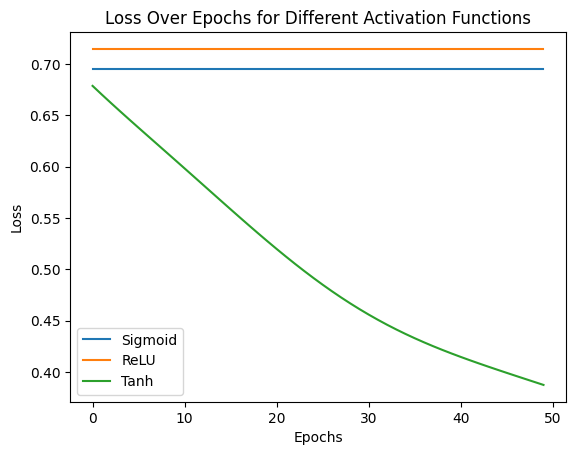

In [10]:
# Plot the losses for each activation function
plt.plot(range(50), loss_sigmoid, label="Sigmoid")
plt.plot(range(50), loss_relu, label="ReLU")
plt.plot(range(50), loss_tanh, label="Tanh")
plt.title("Loss Over Epochs for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()